In [2]:
import numpy as np
import pandas as pd

#modules for statistics
import math
import statistics
from scipy import stats

# Median, Median, Mode, and Central Tendency

mean = average, balance point = sum of all the numbers/total number of values = arithmetic mean

median = middle number when all the values are put in order. If there is an odd number of values, the median is one number. If there is an even number of numbers, you take the middle two and average them. Outliers do not impact the median very much. 

mode = number that occurs the most often

Central Tendency = a single value that attempts to describe the whole dataset. This number represents the middle or center of its distribution.

In [3]:
belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
# belize_df.head(10)
belize_df.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.945690,-87.944620,Entire home/apt,1054,3,0,NaN,NaN,2,347
2792,48287613,"The Luxury Suite - Corozal, Bz- 3Bdr/2bthr CASA1",375769845,Michael,Corozal,Corozal,18.374630,-88.400190,Entire home/apt,401,3,0,NaN,NaN,2,302
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364
2795,48332221,Standard Room - San Ignacio Resort Hotel,60399527,San Ignacio,Cayo,Cayo,17.154127,-89.069689,Private room,226,1,0,NaN,NaN,5,365


In [4]:
belize_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.796000e+03,2.796000e+03,2796.000000,2796.000000,2796.000000,2796.000000,2796.000000,1810.000000,2796.000000,2796.000000
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
min,3.666600e+04,1.507890e+05,16.079260,-89.150680,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.870854e+07,4.389292e+07,17.129573,-88.371015,135.000000,1.000000,0.000000,0.110000,2.000000,221.000000
50%,2.891586e+07,9.171577e+07,17.735145,-88.205560,220.000000,2.000000,2.000000,0.275000,6.000000,349.000000
75%,3.977962e+07,1.875677e+08,17.913837,-87.973793,394.250000,3.000000,13.000000,0.700000,14.000000,364.000000
max,4.833222e+07,3.890334e+08,18.468140,-87.593140,11788.000000,180.000000,316.000000,5.920000,204.000000,365.000000


In [5]:
# get mean of price, minimum_nights, and number_of_reviews
belize_df[["price","minimum_nights","number_of_reviews"]].mean()

price                357.102289
minimum_nights         2.263948
number_of_reviews     14.453505
dtype: float64

In [6]:
belize_df[["price","minimum_nights","number_of_reviews"]].median()
# what do these medians say about the data vs the means?

price                220.0
minimum_nights         2.0
number_of_reviews      2.0
dtype: float64

In [7]:
belize_df[["price","minimum_nights","number_of_reviews"]].mode()

,price,minimum_nights,number_of_reviews
0,151,1.0,0.0
1,252,NaN,NaN


In [8]:
%pip install --upgrade --force-reinstall Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 12.0.0
    Uninstalling pillow-12.0.0:
      Successfully uninstalled pillow-12.0.0
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'frequency')

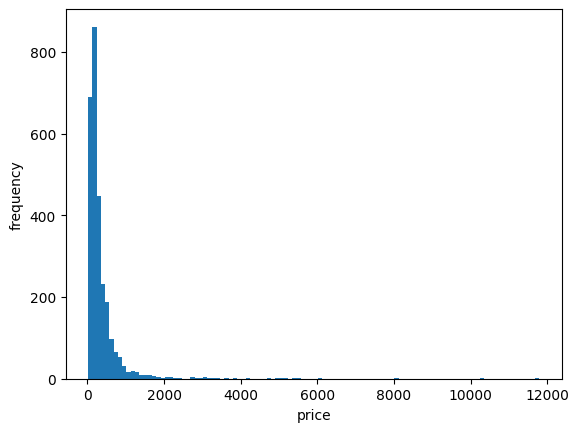

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

#histogram just looks at frequency, so we dont need a y axis
n, bins, patches = plt.hist(x = belize_df['price'], bins = 'auto')
plt.xlabel('price')
plt.ylabel('frequency')

# Variance 
Variance measures how dispersed data points are from the mean. Low variance means that the data points are tightly clustered around the mean. High variance means the data points are spread out from the mean.

Variances is like saying the data points are on average X away from the mean. 

Variance of 0 means that the data is all the same

Degrees of freedom = number of independent pieces of information

In [10]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data)/n
    variance = sum((x-mean)**2 for x in data)/(n-ddof)
    return variance

In [11]:
# variance - 1 DOF is a sample but 0 if a population
variance(belize_df['price'], ddof=1)

317109.568066315

In [12]:
statistics.pvariance(belize_df['price'])

316996.15262709244

In [13]:
# sample variance = 1 DOF 
# most of what we do in this calss will be a sample

statistics.variance(belize_df['price'])

317109.568066315

# Standard Deviation

Standard deviation is the square root of variance

Why? Because many times square units dont make sense. I cant wrap my brain around square dollar. Standard deviation is better because the units make sense to us. We need to get rid of the squared value so we can have an intuitive understanding of what we're talking about.

Tells you how far, on average, each value lies form the mean.

In [14]:
# population standard deviation
statistics.pstdev(belize_df['price'])

563.0241137172478

In [15]:
statistics.stdev(belize_df['price'])

563.1248245871558

In [16]:
# Aggregate function

belize_df[['price']].agg(['mean','std'])

,price
mean,357.102289
std,563.124825


# Coveriance and Correlation

Coveriance is to correlation what variance is to standard deviation

Coveriance tells us how much and to what extent two random variables change together. How much will one variable change as another variable changes. 

Positive = variables change in the same direction
Negative = variables change in the opposite direction

Correlation tells us how strong the relationship is between the variables

correlation = (covariance of x and y)/((standard deviation of x)(standard deviation of y))

In [17]:
np.cov(belize_df['number_of_reviews'],belize_df['price'])

array([[   919.77350828,  -2055.7279794 ],
       [ -2055.7279794 , 317109.56806632]])

In [18]:
np.corrcoef(belize_df['number_of_reviews'],belize_df['price'])

array([[ 1.        , -0.12037063],
       [-0.12037063,  1.        ]])

In [19]:
statistics.stdev(belize_df['number_of_reviews'])

30.327767940997244